# TAREA 1
## Raúl Ramírez Ríos
### Ejercicio 1


Realice un notebook en el se programen y expliquen los siguientes algoritmos de integracion de ecuaciones diferenciales:

    a) Integracion con metodo de Euler
    b) Integracion sobre serie de Taylor a 2 orden
    c) Integracion con metodo de Runge-Kutta de 2 orden
    d) Integracion con metodo de Runge-Kutta de 4 orden


Verifique el funcionamiento de sus integradores encontrando la solución de la siguiente ecuación diferencial para $y(t)$:

$\ddot x+0.5\dot x+sin(x)=e^{−t}sin(3t)$

                                                     
Con condiciones iniciales: 

$\dot x(0)=1$

$x(0)=0$

In [2]:
#usaremos algunas librerias
from pylab import *
from numpy import *
%matplotlib inline
import random

### (a) Metodo de Euler


El método de Euler, es un método numérico de aproximación de ecuaciones diferenciales con problema de valor inicila (condición inicial), si bien en principio es válido para ecuaciones de primer orden, siempre podemos proceder a disminuir el orden de una ecuación, obteniendo así un sistema de ecuaciones que en conjunto describirá el comportamiento de la ecuación original.

Es uno de los métodos más sencillos para resolver este tipo de ecuaciones y se denómina de primer orden ya que que el error local es proporcional al cuadrado del tamaño del paso, y el error global es proporcional al tamaño del paso.

Sabemos que en principio una ecuación diferencial no hace otra cosa que describir el comportamiento de las pendientes de una función, en base a la función original y su variable dependiente. Por lo que podemos expresar lo anterior cómo sigue, (para un punto $P_0\left(x_0,y_0\right)$

$$\left. \frac{dy}{dx} \right|_{P_0} = f\left(x_0,y_0\right) $$

Pero además:

$$\frac{y_1-y_0}{x_1-x_0} = f\left(x_0,y_0\right) $$

$$\implies$$

$$ y_1 = y_0 + (x_1-x_0)f\left(x_0,y_0\right) =  y_0 + hf\left(x_0,y_0\right)$$

Dónde h es el tamaño del paso, elegiremos uno arbitrariamente, sin embargo se puede calcular uno "más adecuado" de la siguiente forma:

$$ h = \frac{x_f-x_0}{n}$$

Posteriormente el proceso se vuelve iterativo, es decir:

$$ y_2 = y_1 + hf\left(x_1,y_1\right)$$

.
.
.
$$ y_{k+1} = y_{k} + hf\left(x_k,y_k\right)$$

In [7]:
#Para disminuir las líneas de código incluyo los metodos que reciben parametros....Perdoname Rich, soy flojo como inge :(

def euler(funcion,p_ini,x,h=0.01,ommega=0):
    tiempos = arange(x[0],x[1] + h, h)
    y = zeros((len(tiempos),len(p_ini)))
    y[0,:] = p_ini
    if ommega == 0:
        for i in range(len(tiempos)-1):
            y[i+1] = y[i] + funcion(y[i],tiempos[i])*h
    else:
        for i in range(len(tiempos)-1):
            y[i+1] = y[i] + funcion(y[i],tiempos[i],ommega)*h
        #solucion = [tiempos,y]
    return tiempos,y


### Metodo de Taylor de 2do orden.

In [21]:
#Para disminuir las líneas de código incluyo los metodos que reciben parametros....Perdoname Rich, soy flojo como inge :(

def taylor(funcion,dfuncion,p_ini,x,h=0.1,ommega=0):
    tiempos = arange(x[0], x[1]+h, h)
    y = zeros((len(tiempos), len(p_ini)))
    y[0,:] = p_ini
    if ommega == 0:
        for i in xrange(len(tiempos)-1):
            f = funcion(y[i,:], tiempos[i])
            df, jacobiano = dfuncion(y[i,:], tiempos[i])
            y[i+1,:] = y[i,:]+h*f+(0.5*h*h*(df+dot(jacobiano, f)))
    else:
        for i in xrange(len(tiempos)-1):
            f = funcion(y[i,:], tiempos[i],ommega)
            df, jacobiano = dfuncion(y[i,:], tiempos[i])
            y[i+1,:]=y[i,:]+h*f+(0.5*h*h*(df+dot(jacobiano, f)))
    return tiempos, y

### Metodo de Runge-Kutta 2do orden

In [34]:
#Para disminuir las líneas de código incluyo los metodos que reciben parametros....Perdoname Rich, soy flojo como inge :(

def rk2(edo,y_i,t,h=0.1,ommega=0):
    tiempos = arange(t[0],t[1]+h, h)
    y=zeros((len(tiempos),len(y_i)))
    y[0,:]=y_i
    if ommega==0:
        for i in xrange(len(tiempos)-1):
            k=h*edo(y[i,:], tiempos[i])
            f=edo(y[i,:]+0.5*k,tiempos[i]+0.5*h)
            y[i+1,:]=y[i,:]+h*f 
    else:
        for i in xrange(len(tiempos)-1):
            k=h*edo(y[i,:], tiempos[i],ommega)
            f=edo(y[i,:]+0.5*k,tiempos[i]+0.5*h,ommega)
            y[i+1,:]=y[i,:]+h*f
    return tiempos,y


In [35]:
#Para disminuir las líneas de código incluyo los metodos que reciben parametros....Perdoname Rich, soy flojo como inge :(

def rk4(edo,y_i,t,h=0.1,omega=0): #Runge Kutta de segundo orden
    tiempo=arange(t[0],t[1]+h, h)
    y=zeros((len(tiempo),len(y_i)))
    y[0,:]=y_i
    if omega==0:
        for i in xrange(len(tiempo)-1):
            k1=edo(y[i,:],tiempo[i])
            k2=edo(y[i,:]+0.5*h*k1,tiempo[i]+0.5*h)
            k3=edo(y[i,:]+0.5*h*k2,tiempo[i]+0.5*h)
            k4=edo(y[i,:]+h*k3,tiempo[i]+h)#evaluando en el i-esimo
            y[i+1,:]=y[i,:]+(h/6.)*(k1+2*k2+2*k3+k4) #cero no esta involucrado, esta en cuenta en p_ini
    else:
         for i in xrange(len(tiempo)-1):
            k1=edo(y[i,:],tiempo[i],omega)
            k2=edo(y[i,:]+0.5*h*k1,tiempo[i]+0.5*h,omega)
            k3=edo(y[i,:]+0.5*h*k2,tiempo[i]+0.5*h,omega)
            k4=edo(y[i,:]+h*k3,tiempo[i]+h,omega)#evaluando en el i-esimo
            y[i+1,:]=y[i,:]+(h/6.)*(k1+2*k2+2*k3+k4) #cero no esta involucrado, esta en cuenta en p_ini
    return tiempo,y


### Integracion con metodo de Euler

Para el metodo de Euler es necesario disminuir el orden de la EDO por tal mótivo tenemos que 

$$\dot x = y$$ 

$$\dot y = e^{-t}sin(3t)+0.5y+sin(x)$$

por lo que tenemos etnonces que

$$ x(0) = 0$$

$$y(0)=1$$

Definimos la función 

EULER


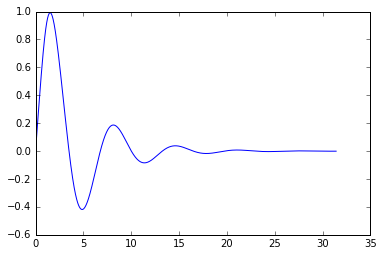

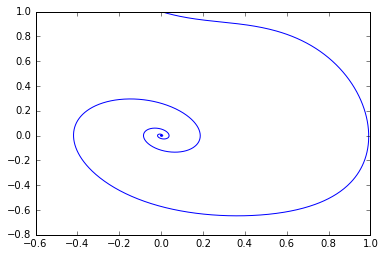

TAYLOR


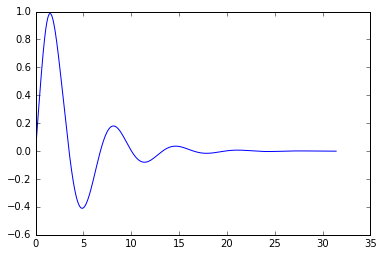

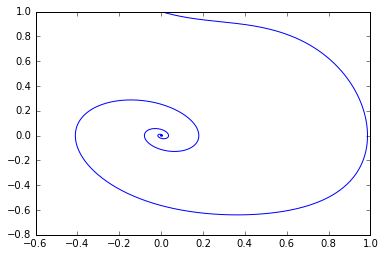

Rungge Kutta 2do Orden


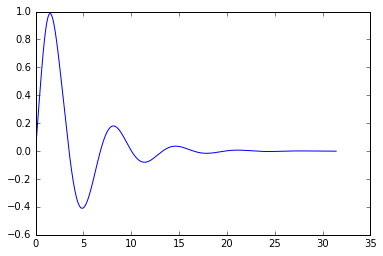

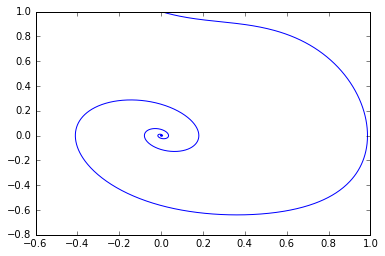

Rungge Kutta 4to Orden


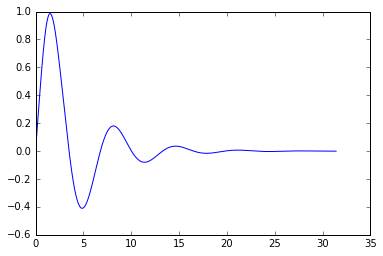

In [51]:
def funcion1(x, t):
    y1 = x[1]
    y2 = -0.5*x[1] - sin(x[0]) + exp(-t)*sin(3*t)
    return array ([y1, y2])

def dfuncion1(x,t):
    return array ([0, (3*cos(3*t)-sin(3*t))*exp(-t)]), array([[0,1],[-cos(x[0]),-0.5]])

tiempos_euler, solucion_euler = euler(funcion1, array([0.0, 1.0]), [0, 10*pi],0.01)
tiempos_taylor, solucion_taylor = taylor(funcion1, dfuncion1, array([0.0, 1.0]), [0, 10*pi], 0.01)
tiempos_rk2, solucion_rk2 = rk2(funcion1, array([0.0, 1.0]), [0, 10*pi],0.01)
tiempos_rk4, solucion_rk4 = rk4(funcion1, array([0.0, 1.0]), [0, 10*pi],0.01)
print"EULER"
plot(tiempos_euler, solucion_euler[:,0])
show()
plot(solucion_euler[:,0], solucion_euler[:,1])
show()

print"TAYLOR"
plot(tiempos_taylor, solucion_taylor[:,0])
show()
plot(solucion_taylor[:,0], solucion_taylor[:,1])
show()

print"Rungge Kutta 2do Orden"
plot(tiempos_rk2, solucion_rk2[:,0])
show()
plot(solucion_rk2[:,0], solucion_rk2[:,1])
show()

print"Rungge Kutta 4to Orden"
plot(tiempos_rk4, solucion_rk4[:,0])
show()


## Ejercicio 2

Utilizando los integradores anteriores encuentre el mejor paso de integracion para la siguiente ecuacion:

$\dddot{y} + \ddot{y}^2 - 3\dot{y}^3 + \cos^2{y} = e^{-t} \sin(3t)$

con condiciones iniciales $\ddot{y}(1) = 1, \dot{y}(1) = 2, y(1) = 1$. En particular que sucede en el intervalo $t \in [1,2]$ y $t \in [1,2.1]$.


Proponemos el cambio de variables:

 $$\dot{y}=x$$
 $$\dot{x}=z$$
 
 Lo que nos lleva a:
 
 $$\dot{z}=e^{-t}\,sin(3t)-z^{2}+3x^{3}-cos^{2}(y)$$

In [55]:
#y = (y1, y2, y3)
def funcion2(y, t):
    y1 = y[1]
    y2 = y[2]
    y3 = exp(-t)*sin(3*t) - y[2]*y[2] + 3*y[1]*y[1]*y[1]+cos(y[0])*cos(y[0])
    return array ([y1, y2, y3])

def dfuncion2(y, t):
    return array([0,0,(3*cos(3*t)-sin(3*t))*exp(-t)]), array([[0,1,0], [0,0,1], [sin(2*y[0]),9*y[1]*y[1],-2*y[2]]])


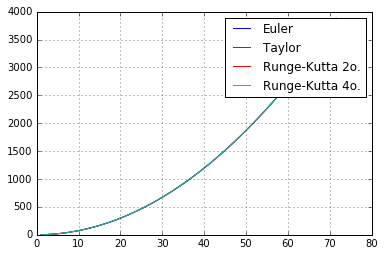

In [59]:
t,y1=euler(funcion2,[1.,2.,1.],[1.,1.96],4e-6)
plot(y1[:,0],y1[:,1],label='Euler')

t,y2=taylor(funcion2,dfuncion2,[1.,2.,1.],[1.,1.96],4e-6)
plot(y2[:,0],y2[:,1],label='Taylor')

t,y3=rk2(funcion2,[1.,2.,1.],[1.,1.96],4e-6)
plot(y3[:,0],y3[:,1],label='Runge-Kutta 2o.')

t,y4=rk4(funcion2,[1.,2.,1.],[1.,1.96],4e-6)
plot(y4[:,0],y4[:,1],label='Runge-Kutta 4o.')

grid(True)
legend()
show()

In [ ]:
t,y1=euler(funcion2,[1.,2.,1.],[1.,1.96],4e-6)
plot(t,y1[:,1],label='Euler')

t,y2=taylor(funcion2,dfuncion2,[1.,2.,1.],[1.,1.96],4e-6)
plot(t,y2[:,1],label='Taylor')

t,y3=rk2(funcion2,[1.,2.,1.],[1.,1.96],4e-6)
plot(t,y3[:,1],label='Runge-Kutta 2o.')

t,y4=rk4(funcion2,[1.,2.,1.],[1.,1.96],4e-6)
plot(t,y4[:,1],label='Runge-Kutta 4o.')

grid(True)
legend()
show()

## Ejercicio 3 

Modifique las funciones integradoras en el problema 1 de tal manera que se puedan pasar argumentos opcionales al sistema de ecuaciones diferenciales de tal manera que se puedan modificar parametros al momento de hacer la integracion. Una vez hecho esto, obtenga la solucion de la siguiente ecucacion diferencial:

$$\ddot x + \frac{1}{10} \dot x+ 4sin(x) = \frac{1}{2} sin(\omega t)$$

Con condiciones iniciales $\dot{x}(0) = 1$ y $x(0) = 0$ y para $\omega = \{1,1.1,1.2,1.3,...,2.9,3\}$. Realice la grafica de algunas soluciones que representen el comportamiento de la solucion en funcion de $\omega$ y explique su resultado.

Para resolver esto es necesario realizar una disminución de orden y obtenemos así un sistema de ecuacione. Haciendo un cambio de variable: 

$$y=\dot x$$ 

$$\Rightarrow$$

$$\dot y = \ddot x$$ 

Sustituyendo en la ecuación, tenemos que: 

$$\dot y + y + 4sin(x) = \frac{1}{2} sin(\omega t)$$ Es decir: $$\dot y = \frac{1}{2} sin(\omega t) - \frac{1}{10} y - 4sin(x)$$

In [25]:
def funcion3(x,t,ommega=1):
    y1 = x[1]
    y2 = -0.5*sin(ommega*t) - 4*sin(x[0]) -(0.1*x[1])
    return array ([y1,y2])

def dfuncion3(y,t,ommega=1):
    return array([0,ommega*cos(ommega*t)]),array([[0,1],[-4*cos(y[0]),-0.1]])

Euler


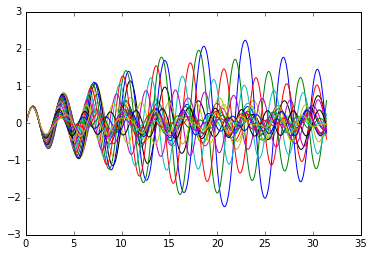

Taylor


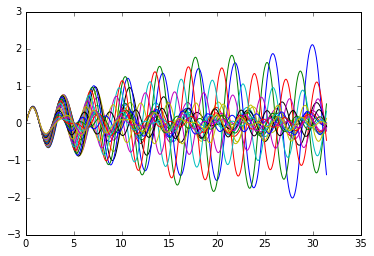

Runge-Kutta 2do Ord


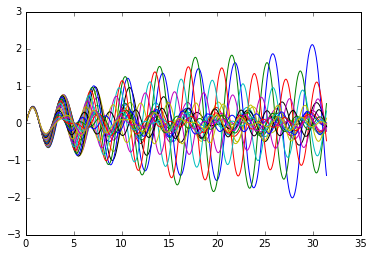

In [39]:
print "Euler"
k = 1
while k <= 3:
    teu, soleu= euler(funcion3, array([0.0, 1.0]), [0, 10*pi],0.01,k)
    plot(teu, soleu[:,0])
    k = k + .1
    
show()
print "Taylor"
k = 1
while k <= 3:
    tta, solta = taylor(funcion3,dfuncion3,[0.0, 1.0],[0, 10*pi],0.01,k)
    plot(tta, solta[:,0])
    k = k + .1

show()
print "Runge-Kutta 2do Ord"
k = 1
while k <= 3:
    trk2, solrk2 = rk2(funcion3,[0.0, 1.0],[0, 10*pi],0.01,k)
    plot(trk2, solrk2[:,0])
    k = k + .1
